## Logistic Regression with MNIST dataset using Tensorflow

### Load all the necessary libraries

In [54]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

#This makes the graphs look nicer 
%config InlineBackend.figure_format = 'svg'

### Load the dataset

In [55]:
#download dataset
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Glimpse of how the dataset looks like 

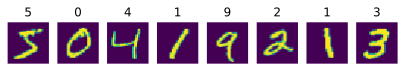

In [56]:
fig, axes = plt.subplots(1, 8, figsize=(7,3))
for img, label, ax in zip(x_train[:8], y_train[:8], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()
    

In [57]:
x_train[:4]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### Preprocessing 

#### Flatten the images: bring them in the scale of 0 to 1 


In [58]:

x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/225



with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train,10))
    y_test = sesh.run(tf.one_hot(y_test,10))

In [59]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Define the hyperparameters 

In [60]:
learning_rate= 0.01
epochs = 10
batch_size = 100
batches = int(x_train.shape[0]/batch_size)

### Define the inputs 

#### X are the flattened images 
#### y are the one_hot labels 

In [61]:

X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])


W = tf.Variable(0 * np.random.rand(784,10).astype(np.float32))
B = tf.Variable(0 * np.random.rand(10).astype(np.float32))

### Define the cost function 

In [62]:

pred = tf.nn.softmax(tf.add(tf.matmul(X,W),B))
cost = tf.reduce_mean(-tf.reduce_sum(Y* tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Predictions and Accuracy 

epoch:0 cost=0.2975
epoch:1 cost=0.7359
epoch:2 cost=0.4995
epoch:3 cost=0.4165
epoch:4 cost=0.4340
epoch:5 cost=0.5124
epoch:6 cost=0.4100
epoch:7 cost=0.3546
epoch:8 cost=0.4456
epoch:9 cost=0.2602
accuracy is 0.8932999968528748


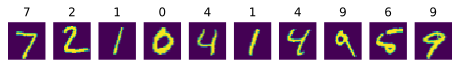

In [72]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch 
            x = x_train[offset: offset+batch_size]
            y= y_train[offset: offset+batch_size]
            sesh.run(optimizer, feed_dict={X:x, Y:y})
            c = sesh.run(cost, feed_dict={X:x,Y:y})
            
        if not epoch % 1:
            print(f'epoch:{epoch} cost={c:.4f}')
            
    correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
    accurracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accurracy.eval({X:x_test, Y: y_test})
    print(f'accuracy is {acc}')
    
    
    fig, axes = plt.subplots(1,10,figsize=(8,4))
    for img, ax in zip(x_test[:10],axes):
        guess = np.argmax(sesh.run(pred,feed_dict={X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28,28)))
        ax.axis('off')